In [30]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [32]:
# Generate summary statistics
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

### Prepare the Data

In [33]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
    # Create a StandardScaler instance
    # Fit the StandardScaler    
market_data_scaler = StandardScaler().fit_transform(market_data_df)
market_data_scaler

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [34]:
# Create a DataFrame with the scaled data
market_data_scaled = pd.DataFrame(market_data_scaler, columns=market_data_df.columns) 

# Copy the crypto names from the original data
market_data_scaled['coin_id'] = market_data_df.index
# Set the coinid column as index
market_data_scaled.set_index('coin_id', inplace=True)
# Display sample data
market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [35]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(market_data_scaled)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}  


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Inertia'>

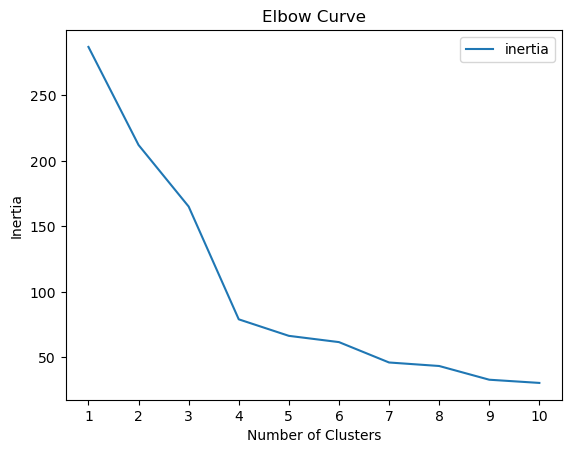

In [36]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k_values, xlabel="Number of Clusters", ylabel="Inertia")


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [37]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init="auto", random_state=1)

In [38]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [39]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_data_df_predict = model.predict(market_data_scaled)

# View the resulting array of cluster values.
market_data_df_predict

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [40]:
# Create a copy of the DataFrame
market_data_df_predict = market_data_df.copy()

In [41]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_predict["class"] = model.labels_

# Display sample data
market_data_df_predict.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


<Axes: title={'center': 'Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

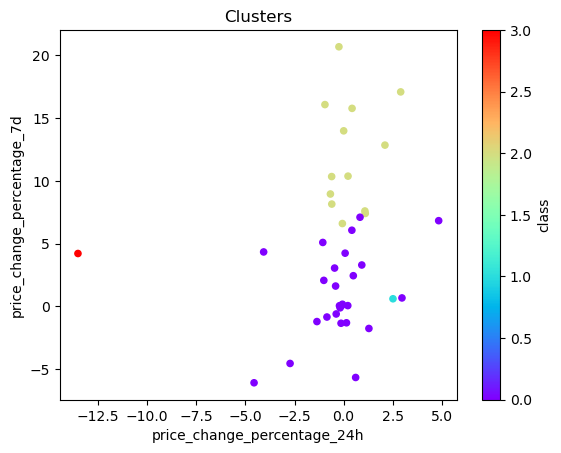

In [42]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df_predict.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="class", colormap="rainbow", title="Clusters")

### Optimize Clusters with Principal Component Analysis.

In [43]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [44]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypt_pca = pca.fit_transform(market_data_scaled)

# View the first five rows of the DataFrame. 
crypt_pca[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [45]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** .89503166

In [46]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(
  crypt_pca, columns=["principal component 1", "principal component 2", "principal component 3"], index=market_data_df.index)

# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head()

,principal component 1,principal component 2,principal component 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [48]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))


# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(pca_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Inertia'>

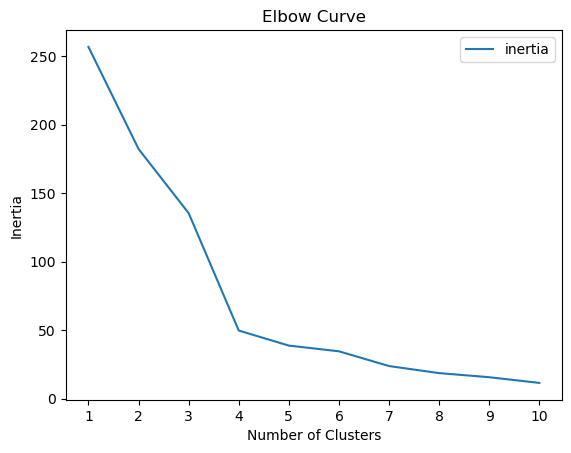

In [49]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k_values, xlabel="Number of Clusters", ylabel="Inertia")

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [50]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init="auto", random_state=1)


In [51]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [52]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_df_predict = model.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_df_predict)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [53]:
# Create a copy of the DataFrame with the PCA data
pca_predict = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_predict["class"] = model.labels_

# Display sample data
pca_predict.head()

,principal component 1,principal component 2,principal component 3,class
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [54]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
pca_predict.hvplot.scatter(x="principal component 1", y="principal component 2", by="class", title="Clusters")

:NdOverlay   [class]
   :Scatter   [principal component 1]   (principal component 2)

### Determine the Weights of Each Feature on each Principal Component

In [55]:
# Use the columns from the original scaled DataFrame as the index.
pca_components = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=market_data_scaled.columns)

pca_components

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 24 hour shows strongest negative influence on PC1, 200 day shows strongest positive influence on PC1, 30 day shows strongest positive influence on PC2, 1 year shows strongest negative influence on PC2, 60 day shows strongest negative influence on PC3, 7 day shows strongest positive influence on PC3
    